In [43]:
%matplotlib inline
import pandas
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import math
from geopy.distance import vincenty
rcParams['figure.figsize'] = 15, 10

In [44]:
data = pandas.read_csv(r"D:\Dokumenty\School\PublicTransport\tramwaje.csv",
					   dtype = {'Status': str, 'FirstLine': int,  'Lines': str,
								'Lon': float, 'Lat': float, 'Time': datetime.datetime, 'LowFloor': bool, 'Brigade': str},
                      parse_dates = ['Time'])
new_data = pandas.read_csv(r"D:\Dokumenty\School\PublicTransport\tramwaje_new.csv",
					   dtype = {'Status': str, 'FirstLine': int,  'Lines': str,
								'Lon': float, 'Lat': float, 'Time': datetime.datetime, 'LowFloor': bool, 'Brigade': str},
                      parse_dates = ['Time'])
data = pandas.concat([data, new_data]).reset_index()

In [45]:
data.head(15)

,index,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
0,0,RUNNING,25,21.034733,25,2017-05-21 15:38:04,52.258099,True,5
1,1,RUNNING,20,20.897888,20,2017-05-21 15:38:00,52.260101,True,6
2,2,RUNNING,4,21.022173,4,2017-05-21 15:38:27,52.207378,True,2
3,3,RUNNING,17,20.997881,"17,18",2017-05-21 15:38:00,52.254669,True,5
4,4,RUNNING,25,20.993887,25,2017-05-21 15:38:08,52.226051,True,1
5,5,RUNNING,28,21.028883,28,2017-05-21 15:38:30,52.256512,True,6
6,6,RUNNING,9,20.946791,9,2017-05-21 15:38:30,52.178928,True,38
7,7,RUNNING,22,20.962631,22,2017-05-21 15:38:30,52.266991,True,7
8,8,RUNNING,9,21.039267,9,2017-05-21 15:38:10,52.235615,True,32
9,9,RUNNING,15,20.980597,15,2017-05-21 15:38:27,52.275333,True,4


In [46]:
data.tail(15)

,index,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade
5297057,2210389,RUNNING,1,20.981314,1,2017-05-31 22:07:21,52.216549,True,7
5297058,2210390,RUNNING,1,20.985210,1,2017-05-31 22:07:26,52.255539,True,11
5297059,2210391,RUNNING,10,21.004740,10,2017-05-31 22:07:26,52.222828,True,14
5297060,2210392,RUNNING,35,20.924740,35,2017-05-31 22:07:28,52.260246,True,13
5297061,2210393,RUNNING,33,20.934177,33,2017-05-31 22:07:19,52.278076,True,19
5297062,2210394,RUNNING,17,20.996681,17,2017-05-31 22:07:29,52.236748,True,33
5297063,2210395,RUNNING,20,21.012001,20,2017-05-31 22:07:27,52.277702,True,015
5297064,2210396,RUNNING,9,21.050053,9,2017-05-31 22:07:22,52.237846,True,33
5297065,2210397,RUNNING,7,21.037224,7,2017-05-31 22:05:59,52.235138,True,6
5297066,2210398,RUNNING,20,21.034325,20,2017-05-31 22:07:27,52.254532,True,11


### Status

In [47]:
len(data[data['Status'] != 'RUNNING'])

0

Kolumna Status przyjmuje tylko jedną wartość, więc można się jej pozbyć.

In [48]:
data = data.drop('Status', 1)

### FirstLine

In [49]:
data.groupby('FirstLine', sort=True).size()

FirstLine
1     292139
2     137827
3     184213
4     205412
6     208459
7     188510
9     476624
10    245600
11    182143
13    141490
14    114123
15    218444
17    282317
18    129558
20    183991
22    226815
23    175448
24    249719
25    188053
26    250914
27     97988
28    190604
31     97618
33    295323
35    257614
44     72462
77      3664
dtype: int64

* Po porównaniu zebranych danych z rozkładem jazdy okazało się, że istnieją dane dla wszystkich funkcjonujących obecnie tramwajów poza linią 77 (linia uzupełniająca).

* Najmniej obserwacji znaleziono dla linii 44 - jest to linia okresowa, co oznacza, że kursuje tylko w dni nauki szkolnej i tylko w określonych porach (5-9 i 14-18).

* Najwięcej obserwacji znaleziono dla linii 9 - jeździ ona bardzo często (w godzinach 8-19 nawet co kilka minut) i kursuje prawie przez całą dobę (zaczyna o 4.10, a kończy o 1.20)

### Lat i Lon

#### Usunięcie danych spoza Warszawy

In [50]:
minLat = 52.09
maxLat = 52.36
minLon = 20.85
maxLon = 21.27

In [51]:
oldLen = len(data)

In [52]:
data = data[(data['Lat'] < maxLat) & (minLat < data['Lat']) & (data['Lon'] < maxLon) & (minLon < data['Lon'])]

In [53]:
len(data) / oldLen

0.9990396581356644

Istnieją dane, dla których współrzędne geograficzne były nieprawidłowe (poza granicami Warszawy), jednak było to zaledwie 0.1% danych.

#### Obliczenie prędkości

In [54]:
startTime = datetime.datetime(year=2017, month=5, day=24, hour=2)
endTime = datetime.datetime(year=2017, month=5, day=25, hour=3)
dataOneDay = data[(data['Time'] > startTime) & (data['Time'] < endTime)]
n = len(dataOneDay)
dataOneDay = dataOneDay.drop_duplicates(subset=['FirstLine', 'Brigade', 'Time']).sort_values('Time')
dataOneDay['TimeDiff'] = dataOneDay.groupby(['FirstLine', 'Brigade'])['Time'].diff()
dataOneDay['PrevLon'] = dataOneDay.groupby(['FirstLine', 'Brigade'])['Lon'].shift()
dataOneDay['PrevLat'] = dataOneDay.groupby(['FirstLine', 'Brigade'])['Lat'].shift()

In [55]:
def dist(x1, y1, x2, y2):
    if any(pandas.isnull([x1, y1, x2, y2])):
        return 0
    obj1 = (x1, y1)
    obj2 = (x2, y2)
    return vincenty(obj1, obj2).meters
dataOneDay['Velocity'] = dataOneDay.apply(lambda x: 
                            dist(x['Lon'], x['Lat'], x['PrevLon'], x['PrevLat']) / (x['TimeDiff'].seconds if pandas.notnull(x['TimeDiff'] and x['TimeDiff']) else 1),
                            axis=1)

Odrzućmy dane z niewiarygodnymi prędkościami (powyżej 80km/h).

In [56]:
dataOneDay = dataOneDay[dataOneDay['Velocity'] < 23]

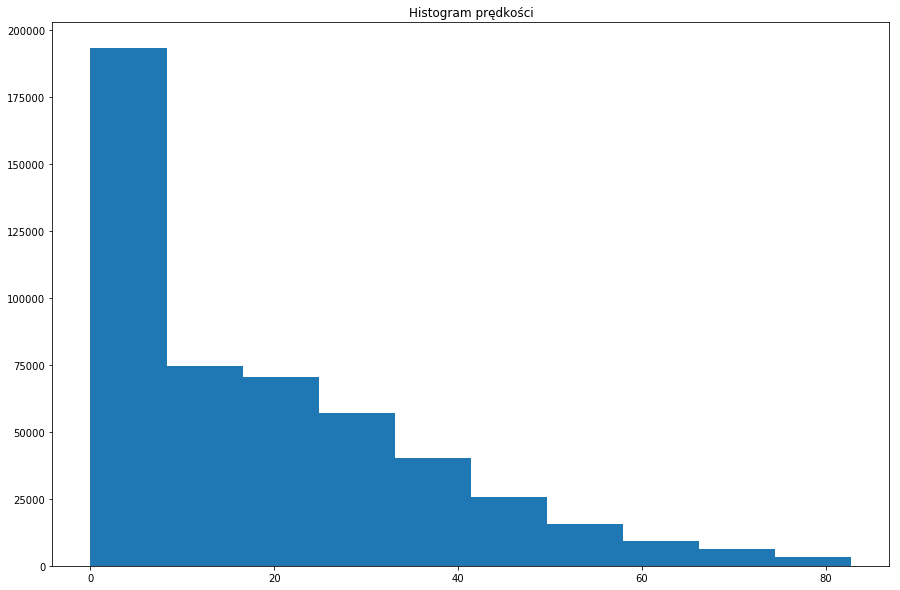

In [57]:
plt.hist(dataOneDay['Velocity'] * 3.6)
plt.title("Histogram prędkości")

Interesujące może być również przyjrzenie się prędkościom różnym od 0. Częste postoje na przystankach mogą nieco zaburzać obraz.

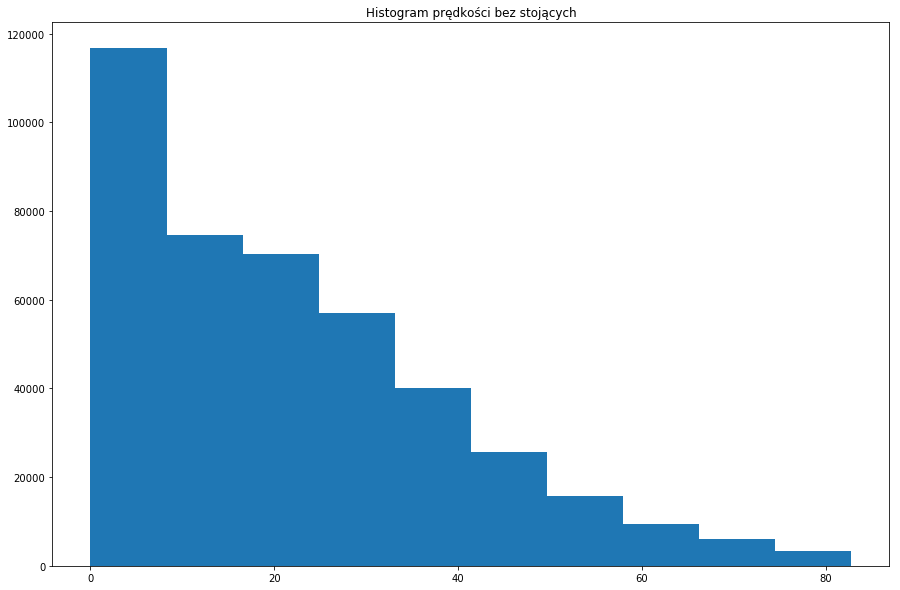

In [58]:
plt.hist(dataOneDay[dataOneDay['Velocity'] != 0]['Velocity'] * 3.6)
plt.title("Histogram prędkości bez stojących")

W przypadku odrzucenia obserwacji stojących tramwajów niskie prędkości wciąż dominują, ale ich przewaga znacząco zmalała.

### Time

In [59]:
data['Day'] = data['Time'].map(lambda x: x.day)

In [60]:
data.groupby('Day').size()

Day
21    128058
22    436128
23    571255
24    602265
25    581940
26    590683
27    217622
28    292584
29    531984
30    689803
31    649663
dtype: int64

Pełne dane są dostępne tylko z okresu 23-26 i 28-30 maja.

In [61]:
startTime = datetime.datetime(year=2017, month=5, day=24, hour=2)
endTime = datetime.datetime(year=2017, month=5, day=25, hour=3)
dataOneDay = data[(data['Time'] > startTime) & (data['Time'] < endTime)]

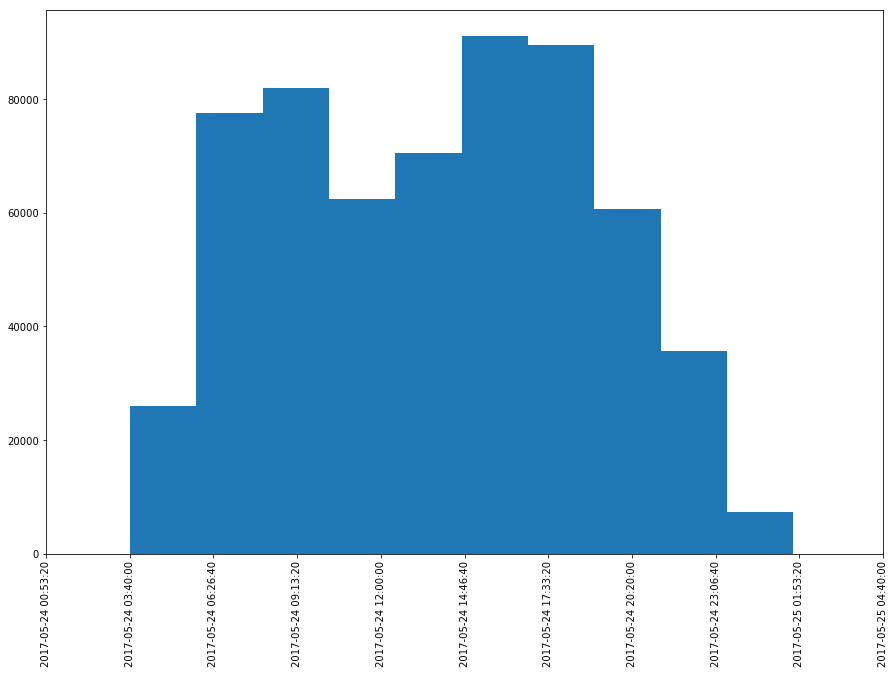

In [62]:
plt.hist([t.timestamp() for t in dataOneDay['Time']])
locs, labels = plt.xticks()
plt.xticks(locs,[datetime.datetime.fromtimestamp(t) for t in locs], rotation='vertical')
plt.show()

Na wykresie można zaobserwować, że najwięcej tramwajów kursuje w porannych i popołudniowych godzinach szczytu.

### LowFloor

In [63]:
dataRoundedTime = data
dataRoundedTime['Time'] = [t - datetime.timedelta(seconds=t.second, microseconds=t.microsecond) for t in dataRoundedTime['Time']]
dataOneDay = dataRoundedTime[(dataRoundedTime['Time'] > startTime) & (dataRoundedTime['Time'] < endTime)]

([<matplotlib.axis.XTick at 0x27909a662e8>,
 <a list of 8 Text xticklabel objects>)

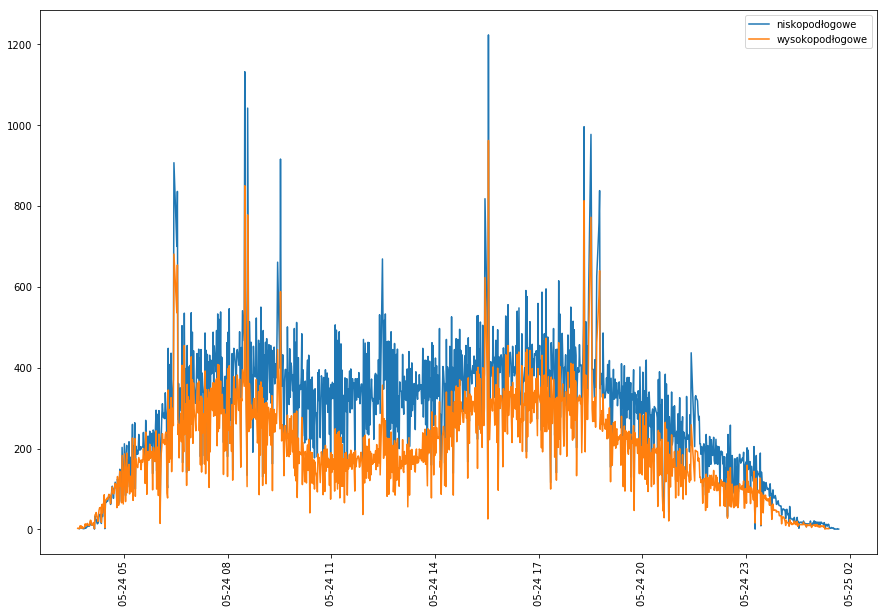

In [64]:
dataLowFloor = dataOneDay[dataOneDay['LowFloor']].groupby('Time').size()
fig, ax = plt.subplots()
ax.plot(dataLowFloor, label="niskopodłogowe")
dataHighFloor = dataOneDay[~dataOneDay['LowFloor']].groupby('Time').size()
ax.plot(dataHighFloor, label="wysokopodłogowe")
legend = ax.legend(loc='upper right')
locs, labels = plt.xticks()
plt.xticks(locs, rotation='vertical')

In [65]:
lowFloorByLine = data.groupby('FirstLine').LowFloor.agg(['sum', 'count'])
lowFloorByLine['LowFloorFraction'] = lowFloorByLine['sum'] / lowFloorByLine['count']
lowFloorByLine.sort_values('LowFloorFraction', ascending=False, inplace=True)
lowFloorByLine = lowFloorByLine.reset_index()

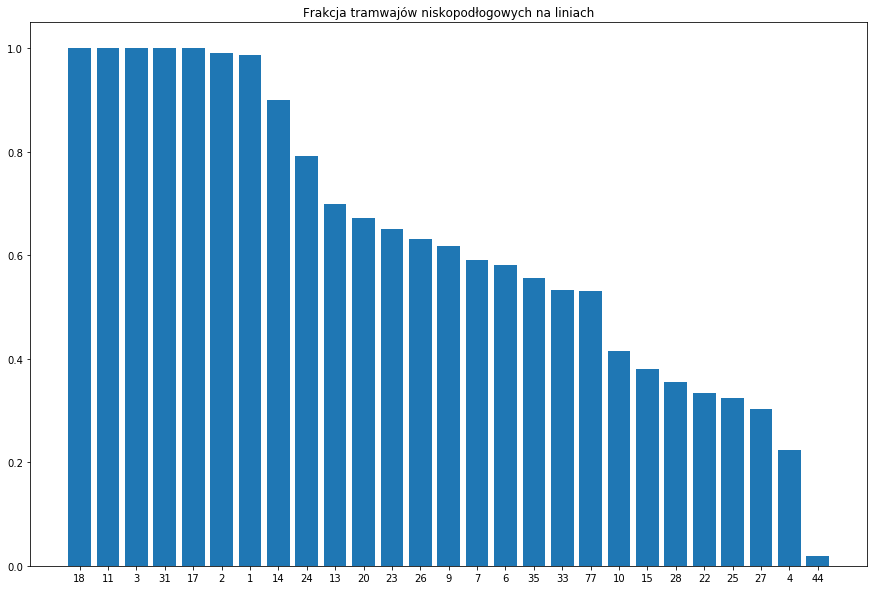

In [66]:
plt.bar(list(range(len(lowFloorByLine))), lowFloorByLine['LowFloorFraction'], tick_label=lowFloorByLine['FirstLine'])
plt.title("Frakcja tramwajów niskopodłogowych na liniach")

Procentowo najwięcej wysokopodłogowych tramwajów kursuje na linii 44 - linii okresowej.

### Porównanie dnia powszedniego i niedzieli

D:\Programy\Anaconda27\envs\py35\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Programy\Anaconda27\envs\py35\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


([<matplotlib.axis.XTick at 0x27909a7a080>,
 <a list of 7 Text xticklabel objects>)

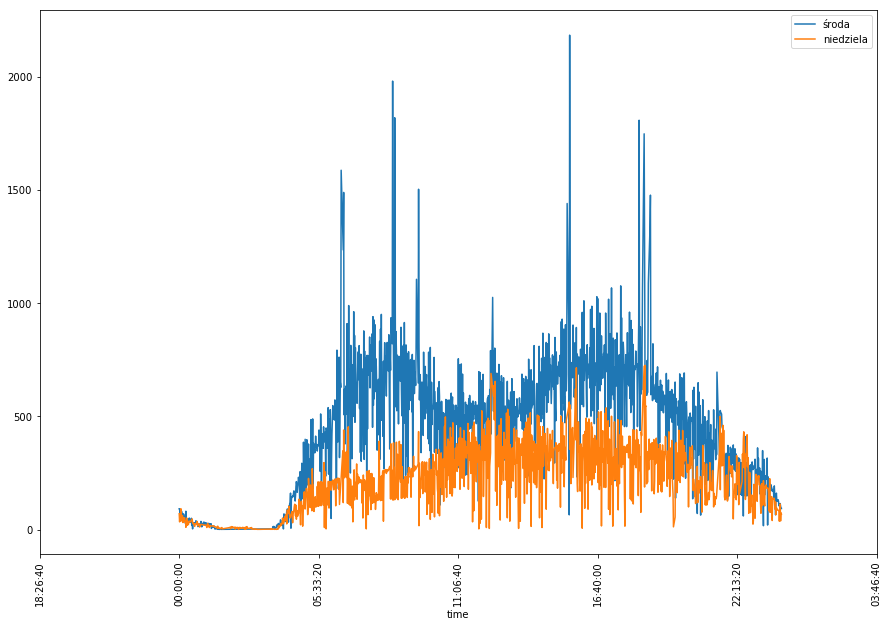

In [67]:
startTime = datetime.datetime(year=2017, month=5, day=24, hour=2)
endTime = datetime.datetime(year=2017, month=5, day=25, hour=3)
data24 = dataRoundedTime[(dataRoundedTime['Time'] > startTime) & (dataRoundedTime['Time'] < endTime)]
data24['Time'] = [t.time() for t in data24['Time']]
startTime = datetime.datetime(year=2017, month=5, day=28, hour=2)
endTime = datetime.datetime(year=2017, month=5, day=29, hour=3)
data28 = dataRoundedTime[(dataRoundedTime['Time'] > startTime) & (dataRoundedTime['Time'] < endTime)]
data28['Time'] = [t.time() for t in data28['Time']]
fig, ax = plt.subplots()
ax.plot(data24.groupby('Time').size(), label="środa")
ax.plot(data28.groupby('Time').size(), label="niedziela")
legend = ax.legend(loc='upper right')
locs, labels = plt.xticks()
plt.xticks(locs, rotation='vertical')

W niedzielę tramwajów jest zauważalnie mniej. Ponadto ich rozkład jest bardziej równomierny - w przeciwieństwie do danych ze środy nie ma spadku w godzinach 11-14.

### Mapy ruchu tramwajów

Na poniższych mapach przedstawione są animowane mapy ruchu tramwajów z dnia 24 maja, utworzone za pomocą skryptu *mapper.py*. Każdy punkt przedstawia obserwację tramwaju, a jego kolor symbolizuje wskazaną cechę. W danych pojawiają się nieciągłości, spowodowane chwilowymi niedostępnościami API. Są jednak sporadyczne. 

In [4]:
import io
import base64
from IPython.display import HTML

def insert_video(filename):
    video = io.open(filename, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''<video width="777" height="770" alt={0} controls>
                    <source src="data:video/webm;base64,{1}" type="video/webm" />
                 </video>'''.format(filename, encoded.decode('ascii')))
# Powyższa funkcja pozwala na dodanie do jupytera filmów tak, że możliwe jest przewijanie do dowolnego momentu, 
# ale ze względu na rozmiar stworzonych filmów, taki notatnik jupytera nie jest w stanie się zapisać
# z tego powodu w ostatecznej wersji filmiki są wstawione bezpośrednio jako HTML i nie da się przewijać do
# nieobejrzanego momentu. W celu odblokowania tej funkcjonalności, poniższe wstawki HTMLowe należy zastąpić
# odpowiednimi wywołaniami funkcji, lub po prostu uruchomić pliki bezpośrednio z dysku.

#### Z uwzględnieniem prędkości

In [3]:
%%HTML
<video width="777" height="770" alt='Brakujący plik - mapa_velocity.webm' controls>
  <source src='mapa_velocity.webm' type="video/webm">
</video>

Na powyższej mapie zdecydowanie dominują punkty w odcieniach czerwieni -- czyli tramwaje o prędkości niższej niż 20 km/h. Wbrew intuicji, sytuacja nie ulega poprawie nawet w nocy, a w godzinach szczytu nie pogarsza się istotnie. Powolne tramwaje nie wydają się być skupione w pojedynczych miejscach, rozkład prędkości wydaje się dosyć równomierny. Warto zwrócić uwagę, że największymi punktami skupień tramwajów są Mokotów i Praga, a nie Śródmieście. Ponadto, gęstość tramwajów po obu stronach Wisły wydaje się podobna na obszarach, w których one w ogóle kursują. Jest dużo obserwacji o niemożliwych współrzędnych (tj. w miejscach, w których tramwaje nie kursują, np. Zielona Białołęka), trudnych do wyeliminowania bez dokładnego dopasowywania do znanych tras tramwajów (bez jednoczesnego usunięcia niektórych poprawnych, ale rzadkich obserwacji, takich, jak zjazdy do zajezdni).

#### Z uwzględnieniem nisko- i wysokopodłogowych

In [5]:
%%HTML
<video width="777" height="770" alt='Brakujący plik - mapa_lowfloor.webm' controls>
  <source src='mapa_lowfloor.webm' type="video/webm">
</video>

Widać zwiększenie udziału tramwajów wysokopodłogowych w godzinach szczytu. Warto też zauważyć, że nawet w późnych godzinach wieczornych, mimo dostępności pojazdów niskopodłogowych, kursuje dużo tramwajów wysokopodłogowych -- przypuszczalnie ze względów logistycznych.

Rozkład tramwajów nisko- i wysokopodłogowych wydaje się równomierny. Nie jest to sprzeczne z wcześniejszymi obserwacjami dotyczącymi frakcji niskopodłogowych składów dla każdej linii -- większość linii obsługuje duże obszary miasta, a ponadto trasy różnych linii częściowo się pokrywają -- na przykład tramwaje linii 14 (90% składów niskopodłogowych) dzielą znaczną część trasy z linią 15 (od Placu Zbawiciela do Bitwy Warszawskiej 1920 r.), dla której dominują pojazdy wysokopodłogowe (ponad 60%).

#### Według linii

In [6]:
%%HTML
<video width="777" height="770" alt='Brakujący plik - mapa_firstline.webm' controls>
  <source src='mapa_firstline.webm' type="video/webm">
</video>

Powyższa mapa obrazuje tramwaje z zaznaczonymi liniami -- na niej jest najłatwiej śledzić ich ruch. Mimo tego, wciąż nie jest to łatwe przy takiej liczbie punktów. Działaniem, które można by podjąć w celu uzyskania czytelniejszej animacji, jest sprawienie, aby była płynna, za pomocą interpolacji -- sprawiłoby to jednak, że dane byłyby mniej wiarygodne, gdyż nie obrazowałyby jedynie rzeczywistych pozycji tramwajów, które nawet bez tego obarczone są dużym błędem.

Należy zauważyć, że rozkład kolorów jest dosyć równomierny, co potwierdza wcześniejsze stwierdzenia -- każda linia obsługuje duży obszar miasta, a trasy różnych linii pokrywają się fragmentami.